In [1]:
from scipy.stats import *
from scipy.integrate import dblquad
import numpy as np
from sympy import *
np.random.seed(seed=2024)

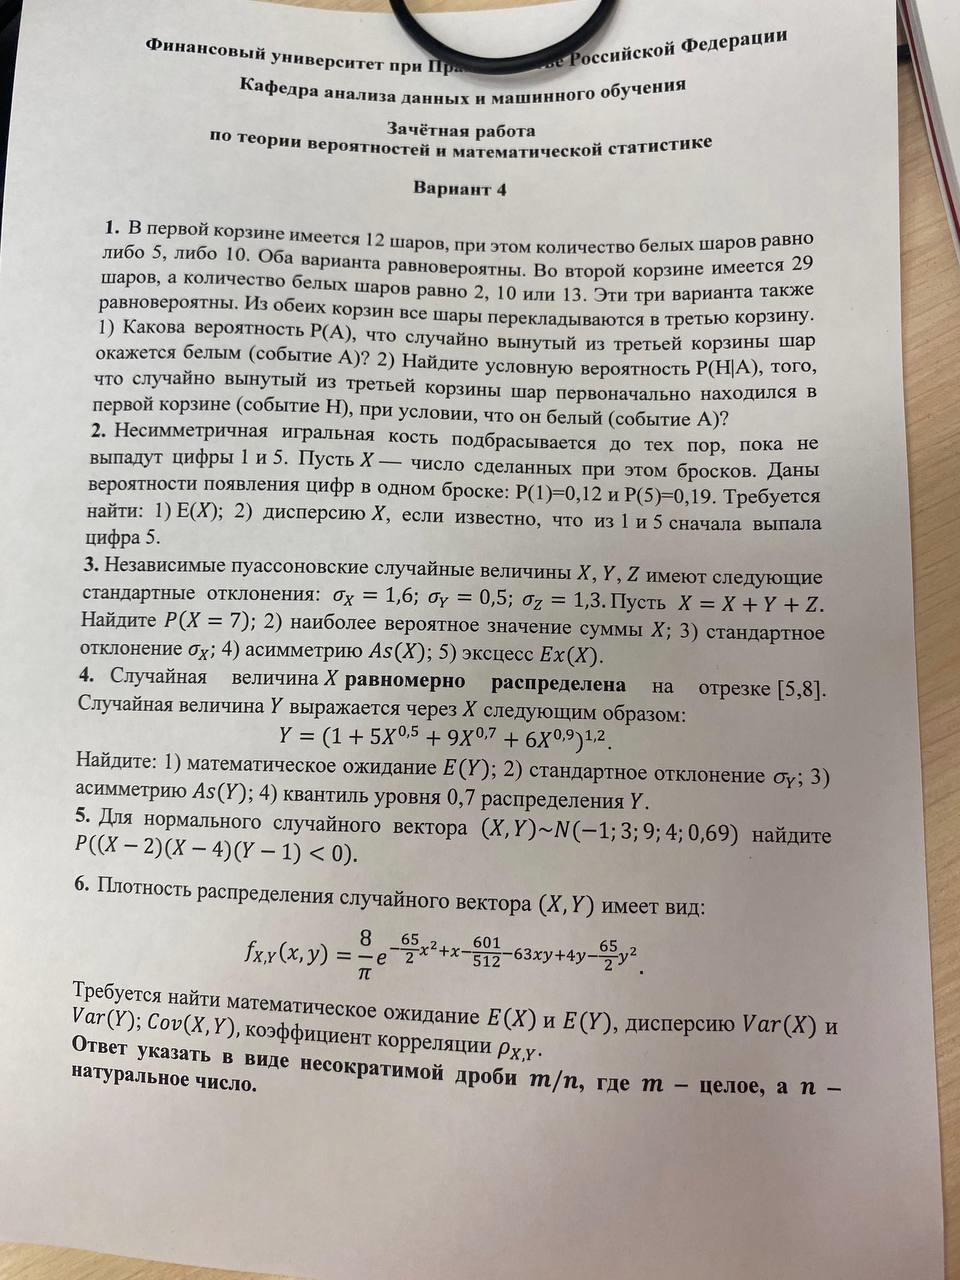

# Вариант 4

## 1
В первой корзине имеется $12$ шаров, при этом количество белых шаров равно либо 5, либо 10. Оба вариант равновероятны. Во второй корзине имеется 29 шаров, а количество белых шаров равно 2, 10 или 13. Эти три варианта также равновероятны. Из обеих корзин все шары перекладываются в третью корзину.

1. Какова вероятность $\mathbb P(A)$, что случайно вынутый из третьей корзины шар окажется белым (событие $A$)?
2. Найдите условную вероятность $\mathbb P(H|A)$, того, что случайно вынутый из третьей корзины шар первоначально находился в первой корзине (событие $H$), при условии, что он белый (событие $A$)

In [26]:
A = rv_discrete(values=((5, 10), (1/2, 1/2)))
B = rv_discrete(values=((2, 10, 13), (1/3, 1/3, 1/3)))
all_balls = 12 + 29 

In [27]:
N = 10_000
x = []
y = []
z = []

for i in range(1, N+1):
    x.append(i)
    
    sample_a = A.rvs(size=i).mean()
    sample_b = B.rvs(size=i).mean()
    sample = sample_a + sample_b
    
    y.append(sample / all_balls)
    z.append(sample_a / sample)
    
P = sum(y)/N
P_ = sum(z)/N
P, P_

(0.3861634225444726, 0.4738081544647976)

## 2

Несимметричная игральная кость подбрасывается до тех пор, пока не вы-
падут цифры $1$ и $5$. Пусть $X$ – число сделанных при этом бросков. Даны
вероятности появления цифр в одном броске: $\mathbb P(1) = 0,12$ и $\mathbb P(5) = 0,19$.
Требуется найти: 
1) $\mathbb E(X)$;
2) $Var(X)$, если известно, что из 1 и 5 сна-
чала выпала цифра 5.

In [28]:
A = rv_discrete(values=((1, 5, 0), [0.12, 0.19, 1 - (0.12 + 0.19)]))

In [29]:
N = 10_000
om = []

for _ in range(N):
    throws = []
    while not(5 in throws and 1 in throws):
        throw = A.rvs(size=1)[0]
        throws.append(throw)
    print(throws)
    om.append(len(throws))

[0, 0, 0, 5, 5, 0, 0, 0, 1]
[0, 5, 0, 5, 0, 0, 0, 1]
[5, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 5, 5, 0, 5, 1]
[1, 0, 0, 0, 0, 0, 0, 5]
[0, 1, 5]
[0, 5, 0, 0, 0, 0, 0, 1]
[0, 5, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 5, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 5, 5, 1]
[5, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 1]
[1, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1]
[0, 0, 0, 5, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 1]
[5, 5, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 5, 0, 1]
[0, 0, 0, 5, 1]
[0, 1, 5]
[0, 0, 0, 0, 5, 0, 0, 5, 5, 0, 5, 5, 0, 1]
[5, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1]
[0, 0, 0, 0, 1, 5]
[5, 0, 0, 0, 0, 1]
[0, 1, 0, 0, 0, 0, 0, 0, 5]
[5, 1]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 5]
[5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 1]
[0, 0, 0, 5, 0, 0, 5, 0, 5, 5, 0, 1]
[5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 1]
[5, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 5, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 

In [30]:
np.mean(om)

10.3823

In [31]:
1/0.12 + 1/0.19 - 1/(0.12+0.19)

10.370684776457272

In [32]:
N = 10_000
om = []

for _ in range(N):
    throws = []
    while not(5 in throws and 1 in throws):
        throw = A.rvs(size=1)[0]
        throws.append(throw)
    
    if throws.count(1) < throws.count(5):
        print(throws)
        om.append(len(throws))

[0, 5, 0, 5, 0, 0, 0, 0, 0, 5, 1]
[0, 0, 0, 5, 5, 0, 0, 1]
[5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 1]
[0, 5, 0, 0, 5, 0, 5, 1]
[5, 0, 0, 5, 0, 5, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 1]
[0, 0, 5, 5, 5, 0, 0, 5, 0, 0, 0, 5, 0, 1]
[0, 5, 5, 1]
[0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 1]
[5, 0, 0, 5, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 1]
[0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 5, 0, 5, 5, 0, 0, 0, 1]
[0, 0, 0, 0, 5, 5, 1]
[0, 0, 0, 0, 5, 0, 5, 0, 0, 5, 0, 5, 0, 1]
[0, 5, 0, 0, 0, 0, 0, 5, 0, 5, 1]
[0, 5, 0, 0, 0, 0, 5, 0, 0, 1]
[0, 0, 5, 0, 0, 5, 0, 1]
[0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 1]
[0, 5, 0, 0, 0, 5, 1]
[0, 0, 5, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 

In [33]:
np.std(om, ddof=1) ** 2

77.12809088606498

## 3

Независимые пуассоновские случайные величины $X, Y, Z$ имеют следующие стандартные отклонения: $\sigma_X = 1,6; \sigma_Y = 0,5; \sigma_Z = 1,3$. Пусть $X = X + Y + Z$.
1) Найдите $\mathbb P(X = 7)$;
2) наиболее вероятное значение суммы $X$($\mathbb E(X)$);
3) стандартное отклонение $\sigma_X$;
4) ассиметрию $As(X)$;
5) эксцесс $Ex(X)$

### Нормально

In [53]:
sigma_x = 1.6
sigma_y = 0.5
sigma_z = 1.3

X = poisson(sigma_x ** 2)
Y = poisson(sigma_y ** 2)
Z = poisson(sigma_z ** 2)

In [54]:
X = poisson(sigma_x ** 2 + sigma_y ** 2 + sigma_z ** 2)

In [56]:
X.pmf(7)

0.08236294962723247

In [60]:
X.expect()

4.4999999999999964

In [62]:
X.std()

2.121320343559643

In [64]:
X.stats(moments='sk')

(0.4714045207910316, 0.22222222222222218)

### Стохастикой

In [68]:
N = 1_000_000
X_sample = X.rvs(size=N)

In [69]:
X_sample.mean()

4.498332

In [70]:
X_sample[X_sample == 7].size / N

0.083088

In [71]:
skew(X_sample)

0.46760651458395963

In [72]:
kurtosis(X_sample)

0.21592852198265167

## 4

Случайная величина $X$ равномерно распределена на отрезке $[5; 8]$. Случайная величина $Y$ выражается через $X$ следующим образом:
$Y = (1 + 5X^{0,5} + 9X^{0,7} + 6X^{0,9})^{1,2}$.
Найдите:
1) математическое ожидание $\mathbb E(Y)$;
2) стандартное отклонение $\sigma_Y$ ;
3) асимметрию $As(Y)$;
4) квантиль уровня $0,7$ распределения $Y$ .

In [73]:
X = uniform(loc=5, scale=3)
X_sample = X.rvs(size=10_000_000)

In [74]:
Y_sample = (1 + 5 * X_sample ** 0.5 + 9 * X_sample ** 0.7 + 6 * X_sample ** 0.9) ** 1.2

In [75]:
Y_sample.mean()

190.49463217688393

In [76]:
np.std(Y_sample)

22.575326323466026

In [77]:
skew(Y_sample)

-0.011994040994816857

In [80]:
np.quantile(Y_sample, 0.7)

206.18502195570622

## 5

Для нормального случайного вектора $(X,Y) \sim N(−1; 3; 9; 4; 0,69)$   
найдите
вероятность $\mathbb P ((X − 2)(X − 4)(Y - 1) < 0)$

In [108]:
mu_X = -1
mu_Y = 3
sigma_X = 9 ** 0.5
sigma_Y = 4 ** 0.5
rho = 0.69

Cov_XY = rho * sigma_X * sigma_Y
mu = [mu_X, mu_Y]
C = [[sigma_X ** 2, Cov_XY], [Cov_XY, sigma_Y ** 2]]

XY = multivariate_normal(mean=mu, cov=C)
X = norm(mu_X, sigma_X)
Y = norm(mu_Y, sigma_Y)

In [109]:
XY_sample = XY.rvs(size=10_000_000)
c = 0
for x, y in XY_sample:
    if (x - 2) * (x - 4) * (y - 1) < 0:
        c += 1
c / 10_000_000

0.2686031

In [110]:
def integrand(y, x):
    return XY.pdf([x, y]) * ((x - 2) * (x - 4) * (y - 1) < 0)

# Установка границ интегрирования
x_min, x_max = -np.inf, np.inf
y_min, y_max = -np.inf, np.inf

# Численное интегрирование
prob, error = dblquad(integrand, x_min, x_max, y_min, y_max)

# Вывод результата
print(f"Probability: {prob:.5f}")

Probability: 0.26839


## 6

Плотность распределения случайного вектора $(X, Y)$ имеет вид:

$$ f_{X, Y}(x, y) = \frac{8}{\pi} e^{-\frac{65}{2} x^2 + x - \frac{601}{512} - 63xy + 4y - \frac{65}{2}y^2} $$

1. Найдите $\mathbb E(X)$, $\mathbb E(Y)$, $Var(X)$, $Var(Y)$, $Cov(X, Y)$ и $\rho(X, Y)$.

In [2]:
x, y = symbols('x, y')

In [3]:
expr = 8 / pi * exp(-Rational(65, 2) * x ** 2 + x - Rational(601, 512) - 63 * x * y + 4 * y - Rational(65, 2) * y ** 2)
expr

8*exp(-65*x**2/2 - 63*x*y + x - 65*y**2/2 + 4*y - 601/512)/pi

In [5]:
nsimplify(integrate(x * integrate(expr, [y, [-oo, +oo]]), [x, -oo, +oo]))

-187/256

In [6]:
ex = -Rational(187, 256)

In [4]:
nsimplify(integrate(y * integrate(expr, [x, [-oo, +oo]]), [y, -oo, +oo]))

197/256

In [7]:
ey = Rational(197, 256)

In [14]:
nsimplify(simplify(integrate(x ** 2 * integrate(expr, [y, [-oo, +oo]]), [x, -oo, +oo]) - ex ** 2))

65/256

In [15]:
nsimplify(simplify(integrate(y ** 2 * integrate(expr, [x, [-oo, +oo]]), [y, -oo, +oo]) - ey ** 2))

65/256

In [19]:
varx = vary = Rational(65, 256)

In [18]:
nsimplify(simplify(integrate(integrate(x * y  * expr, [y, [-oo, +oo]]), [x, -oo, +oo])) - ex * ey)

-63/256

In [21]:
cov = -Rational(63, 256)

In [22]:
cov / sqrt(varx * vary)

-63/65

# Задачи

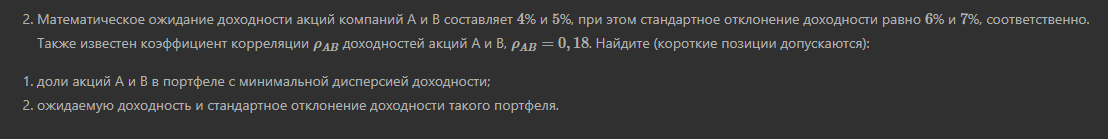

## Аналитика

Пусть $R_A, R_B, R_C$ - доходность акций,  
$\mu(R_A) = 0.02, \mu(R_B) = 0.02, \mu(R_C) = 0.03$, $\mu(R) = \mathbb E(R)$  
$\delta_A = 0.03, \delta_B = 0.04, \delta_C = 0.06$  
Общая доходность: $R_{\pi} = \alpha R_A + \beta R_B + \gamma R_C$, где $\alpha, \beta, \gamma$ - сколько акций купим, Составим систему:  
$$
\begin{cases}
Var(R_\pi) \rightarrow min \\
\alpha + \beta + \gamma = 1
\end{cases}
$$

$\gamma = 1 - \alpha - \beta\\$

$Var(R_\pi) = Var(\alpha R_A + \beta R_B + \gamma R_C) = \alpha^2 Var(R_A) + \beta^2 Var(R_B) + (1-\alpha-\beta)^2 Var(R_C)$, тк события независимы  

$\langle \frac{\partial R_\pi}{\partial \alpha}; \frac{\partial R_\pi}{\partial \beta}; \rangle = 0 \Rightarrow \langle 2 \alpha Var(R_A) - 2(1-\alpha - \beta)Var(R_C); 2 \beta Var(R_B) - 2(1-\alpha - \beta)Var(R_C) \rangle = 0\\$

$$
\begin{cases}
2 \alpha \cdot 0.0009 - 2 (1 - \alpha - \beta) \cdot 0.0036 = 0 \\
2 \beta \cdot 0.0016 - 2 (1 - \alpha - \beta) \cdot 0.0036 = 0 \\
\end{cases}
\Rightarrow
\begin{cases}
\alpha = \frac{16}{29} \\
\beta = \frac{9}{29} \\
\gamma = \frac{4}{29}
\end{cases}
$$

$\mathbb E(R_\pi) = \mathbb E(\frac{16}{29} R_A + \frac{9}{29} R_B + \frac{4}{29} \gamma R_C) = \frac{16}{29} \cdot 0.02 + \frac{9}{29} \cdot 0.02 + \frac{4}{29} \cdot 0.03 \approx 0.021$

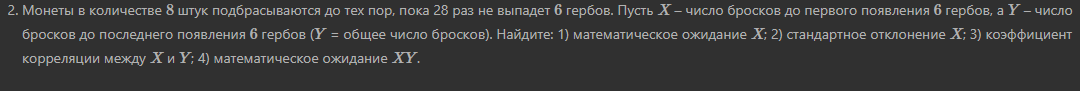

In [13]:
import math
X = geom(math.comb(8, 6) * (1/2) ** 6 * (1/2) ** 2)
X.expect(), X.std()

(9.1428571428371, 8.628382211738)

In [14]:
N = 10 ** 6
X_vals = X.rvs(size=N)
Y_vals = np.sum([X.rvs(size=N) for _ in range(28)], axis=0)

In [15]:
np.corrcoef(X_vals, Y_vals)

array([[ 1.        , -0.00231552],
       [-0.00231552,  1.        ]])

In [16]:
(X_vals * Y_vals).mean()

2343.376274

In [23]:
import math
X = geom(math.comb(11, 5) * (1/2) ** 6 * (1/2) ** 5)
X.expect(), X.std()

(4.432900432899937, 3.9009877999179148)

In [30]:
N = 10 ** 7
X_vals = X.rvs(size=N)
Y_vals = X_vals + np.sum([X.rvs(size=N) for _ in range(13)], axis=0)
Y_vals

array([71, 57, 59, ..., 63, 69, 50])

In [31]:
np.corrcoef(X_vals, Y_vals)[0][1]

0.2669616233780056

In [32]:
(X_vals * Y_vals).mean()

290.33522